## Problem 1: Geocode shopping centers (5 points)

The aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from selected shopping centers in Helsinki**.

In problem 1 the task is to find out the addresses for a list of shopping centers and to geocode these addresses in order to represent them as points. The output should be stored in a Shapefile called `shopping_centers.shp` 

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Mall of Tripla 
 

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://autogis-site.readthedocs.io/en/latest/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [1]:
!pip install geopandas

In [2]:
!pip install geopy

In [3]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

fp = "local_shop.txt"

# Read the data (replace "None" with your own code)
data = pd.read_csv(fp, sep=';')

In [4]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

     id                             name  \
0  1000          Carrick Shopping Center   
1  1001  Dormont Village Shopping Center   
2  1002     East Liberty Shopping Center   
3  1003                  SouthSide Works   
4  1004               Fifth Avenue Place   
5  1005                   Wharton Square   
6  1006      Noble Manor Shopping Center   
7  1007              Squirrel Hill Plaza   

                                                addr  
0         2134 Brownsville Road Pittsburgh, PA 15210  
1      2947 West Liberty Avenue Pittsburgh, PA 15216  
2  5956 Centre Avenue Pittsburgh, Pennsylvania 15206  
3  424 South 27th Street Pittsburgh, Pennsylvania...  
4    120 Fifth Avenue Pittsburgh, Pennsylvania 15222  
5       2021 Wharton Street Pittsburgh, Pennsylvania  
6         2350 Noblestown Road, Pittsburgh, PA 15205  
7         826 Hazelwood Avenue, Pittsburgh, PA 15217  


In [5]:
data.columns.values

array(['id', 'name', 'addr'], dtype=object)

- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

In [6]:
from geopandas.tools import geocode

In [7]:
geo = geocode(data['addr'], provider='nominatim', user_agent='gis_xx', timeout=4)

In [8]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                     geometry  \
0  POINT (-79.98670 40.39254)   
1  POINT (-80.02880 40.39742)   
2  POINT (-79.92648 40.45909)   
3  POINT (-79.96804 40.42500)   
4  POINT (-80.00278 40.44155)   
5  POINT (-79.97666 40.43102)   
6  POINT (-80.05549 40.42756)   
7  POINT (-79.92783 40.41957)   

                                             address  
0  2134, Brownsville Road, Carrick, Pittsburgh, A...  
1  West Liberty Avenue, Beechview, Pittsburgh, Al...  
2  Fine Wine & Good Spirits, 5956, Centre Avenue,...  
3  South 27th Street, South Side Slopes, Pittsbur...  
4  120, Fifth Avenue, Downtown, Pittsburgh, Alleg...  
5  Giant Eagle, 2021, Wharton Street, South Side ...  
6  Fine Wine & Good Spirits, 2350, Noblestown Roa...  
7  826, Hazelwood Avenue, Greenfield, Pittsburgh,...  


In [9]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [10]:
geo = geo.to_crs(epsg=2272)

In [11]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

epsg:2272


- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [12]:
# Join the tables
geodata = geo.join(data)

In [13]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                         geometry  \
0  POINT (1345553.385 393742.788)   
1  POINT (1333875.918 395820.492)   
2  POINT (1362919.916 417561.101)   
3  POINT (1351046.940 405434.930)   
4  POINT (1341532.584 411706.432)   

                                             address    id  \
0  2134, Brownsville Road, Carrick, Pittsburgh, A...  1000   
1  West Liberty Avenue, Beechview, Pittsburgh, Al...  1001   
2  Fine Wine & Good Spirits, 5956, Centre Avenue,...  1002   
3  South 27th Street, South Side Slopes, Pittsbur...  1003   
4  120, Fifth Avenue, Downtown, Pittsburgh, Alleg...  1004   

                              name  \
0          Carrick Shopping Center   
1  Dormont Village Shopping Center   
2     East Liberty Shopping Center   
3                  SouthSide Works   
4               Fifth Avenue Place   

                                                addr  
0         2134 Brownsville Road Pittsburgh, PA 15210  
1      2947 West Liberty Avenue Pittsburgh, PA 15216  
2  5956 Ce

- Save the output as a Shapefile called `shopping_centers.shp` 

In [14]:
# Define output filepath
out_fp = "shopping_centers.shp"

# Save file
geodata.to_file(out_fp)

In [15]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [16]:
geodata = geodata.assign(buffer=0)

In [17]:
geodata

,geometry,address,id,name,addr,buffer
0,POINT (1345553.385 393742.788),"2134, Brownsville Road, Carrick, Pittsburgh, A...",1000,Carrick Shopping Center,"2134 Brownsville Road Pittsburgh, PA 15210",0
1,POINT (1333875.918 395820.492),"West Liberty Avenue, Beechview, Pittsburgh, Al...",1001,Dormont Village Shopping Center,"2947 West Liberty Avenue Pittsburgh, PA 15216",0
2,POINT (1362919.916 417561.101),"Fine Wine & Good Spirits, 5956, Centre Avenue,...",1002,East Liberty Shopping Center,"5956 Centre Avenue Pittsburgh, Pennsylvania 15206",0
3,POINT (1351046.940 405434.930),"South 27th Street, South Side Slopes, Pittsbur...",1003,SouthSide Works,"424 South 27th Street Pittsburgh, Pennsylvania...",0
4,POINT (1341532.584 411706.432),"120, Fifth Avenue, Downtown, Pittsburgh, Alleg...",1004,Fifth Avenue Place,"120 Fifth Avenue Pittsburgh, Pennsylvania 15222",0
5,POINT (1348702.001 407687.469),"Giant Eagle, 2021, Wharton Street, South Side ...",1005,Wharton Square,"2021 Wharton Street Pittsburgh, Pennsylvania",0
6,POINT (1326733.406 406990.858),"Fine Wine & Good Spirits, 2350, Noblestown Roa...",1006,Noble Manor Shopping Center,"2350 Noblestown Road, Pittsburgh, PA 15205",0
7,POINT (1362188.180 403179.264),"826, Hazelwood Avenue, Greenfield, Pittsburgh,...",1007,Squirrel Hill Plaza,"826 Hazelwood Avenue, Pittsburgh, PA 15217",0


- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [18]:
geodata['buffer'] = geodata.buffer(1.5)

In [19]:
print(geodata['buffer'])

0    POLYGON ((1345554.885 393742.788, 1345554.878 ...
1    POLYGON ((1333877.418 395820.492, 1333877.410 ...
2    POLYGON ((1362921.416 417561.101, 1362921.409 ...
3    POLYGON ((1351048.440 405434.930, 1351048.433 ...
4    POLYGON ((1341534.084 411706.432, 1341534.077 ...
5    POLYGON ((1348703.501 407687.469, 1348703.494 ...
6    POLYGON ((1326734.906 406990.858, 1326734.899 ...
7    POLYGON ((1362189.680 403179.264, 1362189.673 ...
Name: buffer, dtype: geometry


In [20]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                         geometry  \
0  POINT (1345553.385 393742.788)   
1  POINT (1333875.918 395820.492)   
2  POINT (1362919.916 417561.101)   
3  POINT (1351046.940 405434.930)   
4  POINT (1341532.584 411706.432)   

                                             address    id  \
0  2134, Brownsville Road, Carrick, Pittsburgh, A...  1000   
1  West Liberty Avenue, Beechview, Pittsburgh, Al...  1001   
2  Fine Wine & Good Spirits, 5956, Centre Avenue,...  1002   
3  South 27th Street, South Side Slopes, Pittsbur...  1003   
4  120, Fifth Avenue, Downtown, Pittsburgh, Alleg...  1004   

                              name  \
0          Carrick Shopping Center   
1  Dormont Village Shopping Center   
2     East Liberty Shopping Center   
3                  SouthSide Works   
4               Fifth Avenue Place   

                                                addr  \
0         2134 Brownsville Road Pittsburgh, PA 15210   
1      2947 West Liberty Avenue Pittsburgh, PA 15216   
2  5956

In [21]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [22]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

In [23]:
geodata['geometry'] = geodata['buffer']

In [24]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  \
0  POLYGON ((1345554.885 393742.788, 1345554.878 ...   
1  POLYGON ((1333877.418 395820.492, 1333877.410 ...   
2  POLYGON ((1362921.416 417561.101, 1362921.409 ...   
3  POLYGON ((1351048.440 405434.930, 1351048.433 ...   
4  POLYGON ((1341534.084 411706.432, 1341534.077 ...   

                                             address    id  \
0  2134, Brownsville Road, Carrick, Pittsburgh, A...  1000   
1  West Liberty Avenue, Beechview, Pittsburgh, Al...  1001   
2  Fine Wine & Good Spirits, 5956, Centre Avenue,...  1002   
3  South 27th Street, South Side Slopes, Pittsbur...  1003   
4  120, Fifth Avenue, Downtown, Pittsburgh, Alleg...  1004   

                              name  \
0          Carrick Shopping Center   
1  Dormont Village Shopping Center   
2     East Liberty Shopping Center   
3                  SouthSide Works   
4               Fifth Avenue Place   

                                                addr  \
0    

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [25]:
geodata = geodata[['id', 'name', 'geometry']]

In [26]:
geodata

,id,name,geometry
0,1000,Carrick Shopping Center,"POLYGON ((1345554.885 393742.788, 1345554.878 ..."
1,1001,Dormont Village Shopping Center,"POLYGON ((1333877.418 395820.492, 1333877.410 ..."
2,1002,East Liberty Shopping Center,"POLYGON ((1362921.416 417561.101, 1362921.409 ..."
3,1003,SouthSide Works,"POLYGON ((1351048.440 405434.930, 1351048.433 ..."
4,1004,Fifth Avenue Place,"POLYGON ((1341534.084 411706.432, 1341534.077 ..."
5,1005,Wharton Square,"POLYGON ((1348703.501 407687.469, 1348703.494 ..."
6,1006,Noble Manor Shopping Center,"POLYGON ((1326734.906 406990.858, 1326734.899 ..."
7,1007,Squirrel Hill Plaza,"POLYGON ((1362189.680 403179.264, 1362189.673 ..."


## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://hri.fi/data/en_GB/dataset/vaestotietoruudukko) on your computer and read it in using geopandas.

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Mall of Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `25858 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [27]:
# Read population grid data for 2018 into a variable `pop`. 
# Remember to check the crs info!
import geopandas as gpd
from pyproj import CRS

fp = "PA_popgrid.csv"
pop = gpd.read_file(fp)

pop.head()

,X,Y,Z,geometry
0,-79.8470829989500146,42.4870833647600321,0.00126862491015344858,None
1,-79.8387496656500133,42.4870833647600321,0.0007204595603980124,None
2,-79.830416332350012,42.4870833647600321,0.000185061944648623466,None
3,-79.8720829988500185,42.4787500314600308,0.00144155754242092371,None
4,-79.8637496655500172,42.4787500314600308,0.000982961966656148434,None


In [28]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 180407
                      X                    Y                        Z geometry
0  -79.8470829989500146  42.4870833647600321   0.00126862491015344858     None
1  -79.8387496656500133  42.4870833647600321    0.0007204595603980124     None
2   -79.830416332350012  42.4870833647600321  0.000185061944648623466     None


In [29]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

In [30]:
print(type(pop.at[0,'X']))

<class 'str'>


In [31]:
gdf = gpd.GeoDataFrame(
    pop, geometry=gpd.points_from_xy(pop.X, pop.Y))

In [32]:
gdf

,X,Y,Z,geometry
0,-79.8470829989500146,42.4870833647600321,0.00126862491015344858,POINT (-79.84708 42.48708)
1,-79.8387496656500133,42.4870833647600321,0.0007204595603980124,POINT (-79.83875 42.48708)
2,-79.830416332350012,42.4870833647600321,0.000185061944648623466,POINT (-79.83042 42.48708)
3,-79.8720829988500185,42.4787500314600308,0.00144155754242092371,POINT (-79.87208 42.47875)
4,-79.8637496655500172,42.4787500314600308,0.000982961966656148434,POINT (-79.86375 42.47875)
...,...,...,...,...
180402,-77.1304163431500172,39.720416709160034,6.58407878875732422,POINT (-77.13042 39.72042)
180403,-77.1054163432500133,39.720416709160034,68.5029678344726562,POINT (-77.10542 39.72042)
180404,-77.0720830100500223,39.720416709160034,24.5632266998291016,POINT (-77.07208 39.72042)
180405,-77.0470830101500184,39.720416709160034,30.0345439910888672,POINT (-77.04708 39.72042)


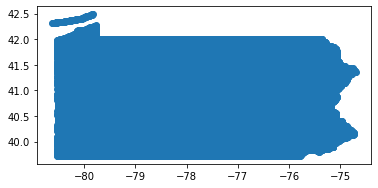

In [33]:
gdf.plot()

In [34]:
gdf.crs

In [35]:
# Define crs
gdf.crs = CRS.from_epsg(2272).to_wkt()

In [36]:
gdf.crs == geodata.crs

True

In [37]:
!pip install rtree
!pip install pygeos

In [41]:
# Create a spatial join between grid layer and buffer layer. 
join = gpd.sjoin(gdf, geodata, how="inner", op="within")

In [42]:
join

,X,Y,Z,geometry,index_right,id,name


In [39]:
# Report how many people live within 1.5 km distance from each shopping center


NotImplementedError: 

**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

YOUR ANSWER HERE

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)